### POSTTEST 6
#### Muhammad Amri Rasyid Ramadhan
#### 2009106047

##### <b>Import Library dan Read Data<b>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv("healthcare-dataset-stroke-data(1).csv", index_col=0)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046.0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676.0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112.0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182.0,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665.0,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234.0,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873.0,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723.0,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


##### Menentukan kolom mana yang akan jadi data learning

### Data Cleaning

In [21]:
df.dropna(inplace=True)

### Encoding

In [22]:
x_data=df.drop("stroke",axis=1)

x_data = pd.get_dummies(df)

#### <b>K-Means Clustering<b>

In [23]:
k_mean = KMeans(n_clusters=2)

In [24]:
k_mean.fit(x_data)

KMeans(n_clusters=2)

In [25]:
x_labels = k_mean.labels_
print(x_labels)

[1 0 1 ... 0 1 0]


In [26]:
points = df[["avg_glucose_level", "bmi"]]

In [27]:
df_k_mean = pd.DataFrame({"Labels": x_labels, "Outcome": df["stroke"]})
crosstab = pd.crosstab(df_k_mean["Labels"], df_k_mean["Outcome"])
crosstab

Outcome,0,1
Labels,,
0,4054,119
1,617,80


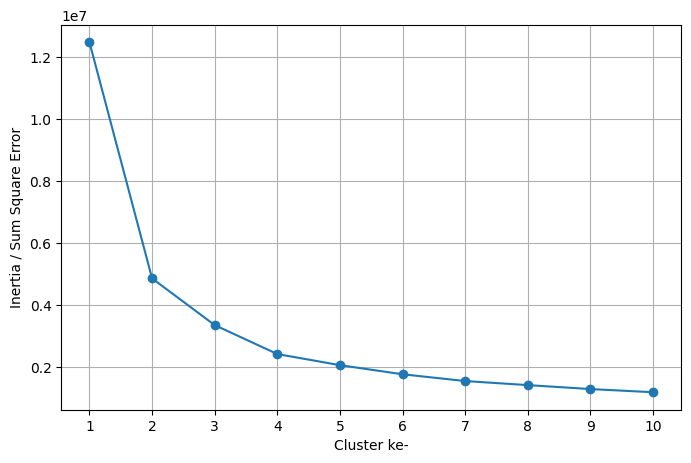

In [28]:
cluster_range = range(1, 11)
inertias = []

for n in cluster_range:
    k_mean = KMeans(n_clusters=n)
    k_mean.fit(x_data)
    inertias.append(k_mean.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ke-')
plt.ylabel('Inertia / Sum Square Error')
plt.xticks(cluster_range)
plt.grid()
plt.show()